# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* Cloudiness and humidity do not show a strong correlation to latitude. The visualizations below show a great variety of values at similar latitudes.
* Wind speed appears to slightly increase as we move away from the equator

---

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [28]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

# Import API key
import api_keys

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [29]:
 # List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

620

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [30]:
# OpenWeatherMap API Key
api_key = api_keys.api_key

# Starting URL for Weather Map API Call
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + api_key

In [31]:

# Create empty lists to append the API data into lists 
city_name = []
cloudiness = []
country = []
date = []
humidity = []
lat = []
lng = []
max_temp = []
wind_speed = []

# Start the call counter 
record = 1

# Log file print statement
print(f"Beginning Data Retrieval")
print(f"-------------------------------")

#Loop through the cities in the city list 
for city in cities:  
    
    # Try statement to append calls where value is found 
    # Not all calls return data as OpenWeatherMap will not have have records in all the cities generated by CityPy module
    try: 
        response = requests.get(f"{url}&q={city}").json() 
        city_name.append(response["name"])
        cloudiness.append(response["clouds"]["all"])
        country.append(response["sys"]["country"])
        date.append(response["dt"])
        humidity.append(response["main"]["humidity"])
        max_temp.append(response["main"]["temp_max"])
        lat.append(response["coord"]["lat"])
        lng.append(response["coord"]["lon"])
        wind_speed.append(response["wind"]["speed"])
        city_record = response["name"]
        print(f"Processing Record {record} | {city_record}")
        print(f"{url}&q={city}")
        
        # Increase counter by one 
        record= record + 1
        
        # Wait a second in loop to not over exceed rate limit of API
        time.sleep(1.01)
        
    # If no record found "skip" to next call
    except:
        print("City not found. Skipping...")
    continue

Beginning Data Retrieval
-------------------------------
Processing Record 1 | Hermanus
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=cb8ed4d7cc3fa83df287f4e7b150861e&q=hermanus
Processing Record 2 | Castro
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=cb8ed4d7cc3fa83df287f4e7b150861e&q=castro
Processing Record 3 | Trairi
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=cb8ed4d7cc3fa83df287f4e7b150861e&q=trairi
Processing Record 4 | Mastic Beach
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=cb8ed4d7cc3fa83df287f4e7b150861e&q=mastic beach
Processing Record 5 | Esperance
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=cb8ed4d7cc3fa83df287f4e7b150861e&q=esperance
Processing Record 6 | Ilulissat
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=cb8ed4d7cc3fa83df287f4e7b150861e&q=ilulissat
Processing Record 7 | Longyearbyen
http://api.openweathermap.org/data/2.5/weather

Processing Record 57 | Saskylakh
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=cb8ed4d7cc3fa83df287f4e7b150861e&q=saskylakh
Processing Record 58 | Punta Arenas
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=cb8ed4d7cc3fa83df287f4e7b150861e&q=punta arenas
Processing Record 59 | Murdochville
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=cb8ed4d7cc3fa83df287f4e7b150861e&q=murdochville
Processing Record 60 | Sainte-Marie
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=cb8ed4d7cc3fa83df287f4e7b150861e&q=sainte-marie
Processing Record 61 | Chokurdakh
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=cb8ed4d7cc3fa83df287f4e7b150861e&q=chokurdakh
City not found. Skipping...
City not found. Skipping...
Processing Record 62 | Arraial do Cabo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=cb8ed4d7cc3fa83df287f4e7b150861e&q=arraial do cabo
Processing Record 63 | Tiarei
http:/

Processing Record 112 | Amapa
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=cb8ed4d7cc3fa83df287f4e7b150861e&q=amapa
City not found. Skipping...
Processing Record 113 | Koslan
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=cb8ed4d7cc3fa83df287f4e7b150861e&q=koslan
City not found. Skipping...
Processing Record 114 | Umm Lajj
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=cb8ed4d7cc3fa83df287f4e7b150861e&q=umm lajj
Processing Record 115 | Buenaventura
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=cb8ed4d7cc3fa83df287f4e7b150861e&q=buenaventura
Processing Record 116 | Bobcaygeon
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=cb8ed4d7cc3fa83df287f4e7b150861e&q=bobcaygeon
Processing Record 117 | Tashla
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=cb8ed4d7cc3fa83df287f4e7b150861e&q=tashla
Processing Record 118 | New Norfolk
http://api.openweathermap.org/data/2.5/w

Processing Record 167 | Sakaraha
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=cb8ed4d7cc3fa83df287f4e7b150861e&q=sakaraha
Processing Record 168 | Trelew
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=cb8ed4d7cc3fa83df287f4e7b150861e&q=trelew
Processing Record 169 | Coihaique
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=cb8ed4d7cc3fa83df287f4e7b150861e&q=coihaique
City not found. Skipping...
Processing Record 170 | Ponta do Sol
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=cb8ed4d7cc3fa83df287f4e7b150861e&q=ponta do sol
Processing Record 171 | Mount Gambier
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=cb8ed4d7cc3fa83df287f4e7b150861e&q=mount gambier
Processing Record 172 | Cortes
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=cb8ed4d7cc3fa83df287f4e7b150861e&q=cortes
City not found. Skipping...
Processing Record 173 | Arlit
http://api.openweathermap.org/da

Processing Record 222 | Bangui
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=cb8ed4d7cc3fa83df287f4e7b150861e&q=bangui
Processing Record 223 | Lompoc
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=cb8ed4d7cc3fa83df287f4e7b150861e&q=lompoc
Processing Record 224 | Hilo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=cb8ed4d7cc3fa83df287f4e7b150861e&q=hilo
Processing Record 225 | Taltal
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=cb8ed4d7cc3fa83df287f4e7b150861e&q=taltal
Processing Record 226 | Samarai
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=cb8ed4d7cc3fa83df287f4e7b150861e&q=samarai
Processing Record 227 | Srednekolymsk
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=cb8ed4d7cc3fa83df287f4e7b150861e&q=srednekolymsk
Processing Record 228 | Burnie
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=cb8ed4d7cc3fa83df287f4e7b150861e&q=burnie
P

Processing Record 278 | Puqi
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=cb8ed4d7cc3fa83df287f4e7b150861e&q=puqi
Processing Record 279 | Kutum
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=cb8ed4d7cc3fa83df287f4e7b150861e&q=kutum
Processing Record 280 | Alugan
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=cb8ed4d7cc3fa83df287f4e7b150861e&q=alugan
Processing Record 281 | Ampanihy
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=cb8ed4d7cc3fa83df287f4e7b150861e&q=ampanihy
Processing Record 282 | Teguldet
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=cb8ed4d7cc3fa83df287f4e7b150861e&q=teguldet
Processing Record 283 | Tuyen Quang
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=cb8ed4d7cc3fa83df287f4e7b150861e&q=tuyen quang
Processing Record 284 | Saldanha
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=cb8ed4d7cc3fa83df287f4e7b150861e&q=saldan

Processing Record 334 | Antsohihy
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=cb8ed4d7cc3fa83df287f4e7b150861e&q=antsohihy
Processing Record 335 | San Policarpo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=cb8ed4d7cc3fa83df287f4e7b150861e&q=san policarpo
Processing Record 336 | Tevaitoa
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=cb8ed4d7cc3fa83df287f4e7b150861e&q=tevaitoa
Processing Record 337 | Pryazha
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=cb8ed4d7cc3fa83df287f4e7b150861e&q=pryazha
Processing Record 338 | Vire
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=cb8ed4d7cc3fa83df287f4e7b150861e&q=vire
Processing Record 339 | Hami
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=cb8ed4d7cc3fa83df287f4e7b150861e&q=hami
Processing Record 340 | Dingle
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=cb8ed4d7cc3fa83df287f4e7b150861e&q=di

Processing Record 390 | Puerto Madryn
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=cb8ed4d7cc3fa83df287f4e7b150861e&q=puerto madryn
Processing Record 391 | Qasigiannguit
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=cb8ed4d7cc3fa83df287f4e7b150861e&q=qasigiannguit
City not found. Skipping...
Processing Record 392 | Deputatskiy
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=cb8ed4d7cc3fa83df287f4e7b150861e&q=deputatskiy
Processing Record 393 | Yarensk
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=cb8ed4d7cc3fa83df287f4e7b150861e&q=yarensk
Processing Record 394 | Slave Lake
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=cb8ed4d7cc3fa83df287f4e7b150861e&q=slave lake
Processing Record 395 | Mananjary
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=cb8ed4d7cc3fa83df287f4e7b150861e&q=mananjary
Processing Record 396 | Ayan
http://api.openweathermap.org/data/2.5/weat

Processing Record 446 | Coahuayana
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=cb8ed4d7cc3fa83df287f4e7b150861e&q=coahuayana
City not found. Skipping...
Processing Record 447 | Chernushka
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=cb8ed4d7cc3fa83df287f4e7b150861e&q=chernushka
Processing Record 448 | Nagod
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=cb8ed4d7cc3fa83df287f4e7b150861e&q=nagod
Processing Record 449 | Cap Malheureux
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=cb8ed4d7cc3fa83df287f4e7b150861e&q=cap malheureux
Processing Record 450 | Balikpapan
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=cb8ed4d7cc3fa83df287f4e7b150861e&q=balikpapan
City not found. Skipping...
Processing Record 451 | Turlock
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=cb8ed4d7cc3fa83df287f4e7b150861e&q=turlock
City not found. Skipping...
Processing Record 452 | Inuvik

Processing Record 501 | Anadyr
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=cb8ed4d7cc3fa83df287f4e7b150861e&q=anadyr
Processing Record 502 | Tsabong
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=cb8ed4d7cc3fa83df287f4e7b150861e&q=tsabong
Processing Record 503 | Kristianstad
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=cb8ed4d7cc3fa83df287f4e7b150861e&q=kristianstad
Processing Record 504 | Ilhabela
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=cb8ed4d7cc3fa83df287f4e7b150861e&q=ilhabela
Processing Record 505 | Chulman
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=cb8ed4d7cc3fa83df287f4e7b150861e&q=chulman
Processing Record 506 | Solnechnyy
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=cb8ed4d7cc3fa83df287f4e7b150861e&q=solnechnyy
Processing Record 507 | Hopkinsville
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=cb8ed4d7cc3fa83df287f

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [32]:
# Create a dictonary with the lists generated
weatherpy_dict = {
    "City": city_name,
    "Cloudiness":cloudiness, 
    "Country":country,
    "Date":date, 
    "Humidity": humidity,
    "Lat":lat, 
    "Lng":lng, 
    "Max Temp": max_temp,
    "Wind Speed":wind_speed
}

# Create a data frame from dictionary
weather_data = pd.DataFrame(weatherpy_dict)

# Display count of weather data values 
weather_data.count()

City          554
Cloudiness    554
Country       554
Date          554
Humidity      554
Lat           554
Lng           554
Max Temp      554
Wind Speed    554
dtype: int64

In [33]:
# Save data frame to CSV
weather_data.to_csv('weather_data.csv')

# Display data frame head 
weather_data.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Hermanus,32,ZA,1552787290,98,-34.42,19.24,64.99,2.80
1,Castro,44,CL,1552784400,87,-42.48,-73.76,53.60,2.24
2,Trairi,36,BR,1552787858,100,-3.28,-39.27,81.36,7.16
3,Mastic Beach,1,US,1552787909,38,40.77,-72.85,41.00,14.99
4,Esperance,20,TT,1552787706,83,10.24,-61.45,77.00,5.82


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

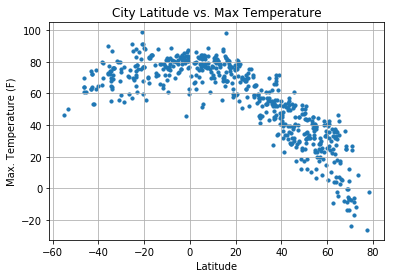

In [34]:
# Build a scatter plot for each data type
plt.scatter(weather_data["Lat"], weather_data["Max Temp"], marker="o", s=10)

# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature")
plt.ylabel("Max. Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("Max_Temp_vs_Latitude.png")

# Show plot
plt.show()

#### Latitude vs. Humidity Plot

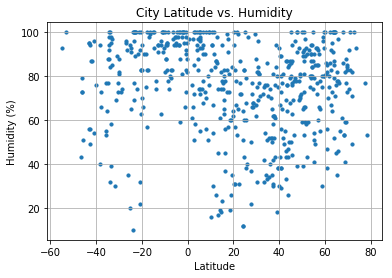

In [35]:
# Build a scatter plot for each data type
plt.scatter(weather_data["Lat"], weather_data["Humidity"], marker="o", s=10)

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("Humidity_vs_Latitude.png")

# Show plot
plt.show()

#### Latitude vs. Cloudiness Plot

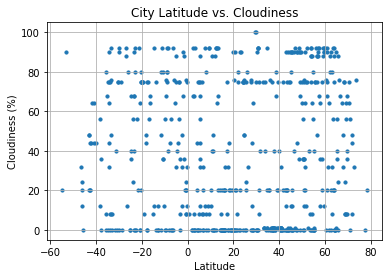

In [36]:
# Build a scatter plot for each data type
plt.scatter(weather_data["Lat"], weather_data["Cloudiness"], marker="o", s=10)

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("Cloudiness_vs_Latitude.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

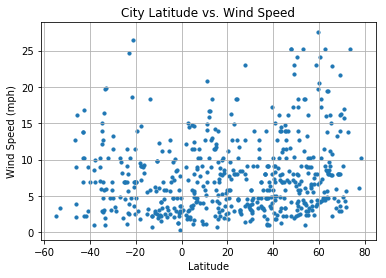

In [37]:
# Build a scatter plot for each data type
plt.scatter(weather_data["Lat"], weather_data["Wind Speed"], marker="o", s=10)

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("Wind_Speed_vs_Latitude.png")

# Show plot
plt.show()